# Instructions

This Jupyter notebook is intended as a way to demonstrate `finnsurveytext` functions and allow users to explore different settings. 

This tutorial goes through the main functions in the package. If you download a local version of this notebook, it can be used to follow the "main" path through the package to do some initial data exploration of your own data. 

### First, let's load the package

In [1]:
# install.packages("finnsurveytext")
# library(finnsurveytext)

In [56]:
# This cell will be removed once the new version of finnsurveytext is released. 

library(devtools)
load_all('/Users/adelineclarke/Documents/Uni Helsinki Work/2024/finnsurveytext_2024dev')


ℹ Loading finnsurveytext


### Data

The `finnsurveytext` comes with 2 sample datasets. These are the `child` dataset and the `dev_coop` dataset. These both comes from the Finnish Social Science Data Archive. For more information about the data, see the websites: 

* `child`: https://urn.fi/urn:nbn:fi:fsd:T-FSD3134
* `dev_coop`: https://urn.fi/urn:nbn:fi:fsd:T-FSD2821

The functions in this tutorial will be 'preset' with values relevant for the `child` dataset, but you could change these to instead look at the `dev_coop` dataset, or you can add in your own survey using `read.csv()` or `read_excel` (the later requiring the `readxl` package).

#### Here, you can see the first few rows of the data, so that you know what is included:

* fsd_id: the id column
* q3, q7, q11: 3 open-ended questions included in the survey
* paino: data for weighting for each response
* gender, major_region, daycare_before_school: covariate data we may use for comparing responses between groups

In [13]:
head(child)
# head(dev_coop)
# data <- read.csv("path/to/CSVFileExample.csv", header = TRUE, sep = ",")


,fsd_id,q3,q7,q11,paino,gender,major_region,daycare_before_school
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,"pelaaminen, telkkarin katsominen, pukeminen, kellari-leikissä, käsien pesu",Jos kaveri tönii. Jos lyö. Jos tappelee.,Kun kaveri tekee jotain kivaa.,"144,090909090909",boy,Länsi-Suomi,yes
2,2,"Piirtämisessä, askartelemisessa, leikkimisessä, auttamisessa, kirjoittamisessa, lukemisessa ja tanssimisessa.",Kun nimitellään ja tönitään. Ottaa joltain kaverilta kädestä jotain.,"Jäätelö, shoppailu, synttärit ja kouluun meno.","150,55737704918",girl,Helsinki-Uusima,yes
3,3,Kiipeilemisessä ja lukemisessa.,Ei halua vastata.,Jos saan karkkia ja tehdä jotain kivaa.,"157,243243243243",girl,Etelä-Suomi,yes
4,4,"Valtapeleissä, Sählyssä",Satuttaa tai sanoo toiselle jonkun pahan asian,Ei tule kovin paljon mieleen mitään,"147,692307692308",boy,Helsinki-Uusima,yes
5,5,"piirtämisessä, tekemään kärrynpyöriä, pomppimaan; olis pitkä lista, niin se kestäis kauankin","haukkuu toisia, ylentää itseään ja alentaa toisia","se kun äiti laittaa hyvää ruokaa, ja kun me saadaan syödä karkkia, ja mun syntymäpäivät","150,55737704918",girl,Helsinki-Uusima,yes
6,6,"uimisessa, kiipeilyssä","semmosta satuttaa toista, vois olla vaikka joku syy","jos naurattaa mua, jos on joku tosi hauska paikka","144,471698113208",girl,Länsi-Suomi,no


## Step 1: Format the data

The relevant function here is `fst_prepare()`. 

* data: the name of the dataframe contain the survey data
* question: the column of 'data' that contains the open-ended question
* id: the ID column in 'data'
* model: a Finnish language model available for `udpipe`, "ftb" or "tdt". For more info on these, see https://universaldependencies.org
    * if you do not provide a value, this will default to "ftb"
* stopword_list: a list of stopwords to remove from your 'data'. To find relevant stopwords lists, you can run `fst_find_stopwords()`
    * if you do not provide a value, this will default to "nltk"
    * "manual" can be used to indicate that a manual list will be provided.
* weights: optional, if your 'data' contains weightings for each response, the column containing these
    * if you do not provide a value, this will default to NULL
* add_columns: any columns you want to add to the formatted data, such as for use in comparison functions
    * if you do not provide any values, this will default to NULL
* manual: an optional boolean to indicate that a manual list will be provided, 'stopword_list = "manual"' can also or instead be used.
    * if you do not provide any values, this will default to FALSE
* manual_list: the manual list of stopwords if you choose to provide one. 
    * if you do not provide any values, this will default to an empty list. 
    
#### We will prepare our data below:


In [20]:
df <- fst_prepare(data = child,
                  question = 'q11',
                  id = 'fsd_id',
                  model = 'ftb',
                  stopword_list = 'nltk',
                  weights = 'paino',
                  add_cols = c('gender', 'major_region', 'daycare_before_school'),
                  manual = FALSE,
                  manual_list = "")

#### Here, we can see the first 10 rows of the formatted data:

In [10]:
head(df, 10)

,doc_id,paragraph_id,sentence_id,sentence,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc,weight,gender,major_region,daycare_before_school
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,1,1,Kun kaveri tekee jotain kivaa.,2,kaveri,kaveri,NOUN,"N,Sg,Nom",Case=Nom|Number=Sing,3,nsubj,NA,NA,144.0909,boy,Länsi-Suomi,yes
2,1,1,1,Kun kaveri tekee jotain kivaa.,3,tekee,tehdä,VERB,"V,Act,Ind,Pres,Sg3",Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act,0,root,NA,NA,144.0909,boy,Länsi-Suomi,yes
3,1,1,1,Kun kaveri tekee jotain kivaa.,4,jotain,jokin,DET,"Pron,Qnt,Sg,Par",Case=Par|Number=Sing|PronType=Ind,5,det,NA,NA,144.0909,boy,Länsi-Suomi,yes
4,1,1,1,Kun kaveri tekee jotain kivaa.,5,kivaa,kiva,ADJ,"A,Sg,Par",Case=Par|Number=Sing,3,obj,NA,SpaceAfter=No,144.0909,boy,Länsi-Suomi,yes
5,10,1,1,Ei vastausta.,2,vastausta,vastaus,NOUN,"N,Sg,Par",Case=Par|Number=Sing,1,nsubj,NA,SpaceAfter=No,147.6923,boy,Helsinki-Uusima,yes
6,100,1,1,Kun saa lahjoja toiselta.,2,saa,saada,VERB,"V,Act,Ind,Pres,Sg3",Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act,0,root,NA,NA,144.4717,girl,Länsi-Suomi,yes
7,100,1,1,Kun saa lahjoja toiselta.,3,lahjoja,lahja,NOUN,"N,Pl,Par",Case=Par|Number=Plur,2,obj,NA,NA,144.4717,girl,Länsi-Suomi,yes
8,100,1,1,Kun saa lahjoja toiselta.,4,toiselta,toinen,NOUN,"N,Sg,Abl",Case=Abl|Number=Sing,2,nmod,NA,SpaceAfter=No,144.4717,girl,Länsi-Suomi,yes
9,101,1,1,EOS,1,eos,eos,PROPN,"N,Prop,Sg,Nom",Case=Nom|Number=Sing,0,root,NA,SpacesAfter=\n,144.0909,boy,Länsi-Suomi,yes


## Step 2: Summary Tables

The next 3 functions provide summaries of the data: 

* `fst_summarise`: shows the number of survey participants who did and did not provide an answer to this question and number of words used in responses.
    * There are 2 inputs to this function. The first (data) is your formatted dataframe which we've called "df" above and the second (desc) is an optional name for the data, the default value is "All respondents". 
* `fst_pos`: provides the count and percentage of each part-of-speech (type of word) tag within the responses (once stopwords and punctuation have been removed)
    * the only input to this function (data) is your "df". 
* `fst_length summary`: summarises the range of response lengths.
    * the inputs are your "df" (data), an optional name (desc), and a boolean (incl_sentences)for whether to include length summary information for sentences as well as words. 


In [12]:
fst_summarise(data = df,
              desc = "All respondents") 

fst_pos(data = df)
  
fst_length_summary(data = df,
                   desc = "All respondents",
                   incl_sentences = TRUE) 

Description,Respondents,No Response,Proportion,Total Words,Unique Words,Unique Lemmas
<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>
All respondents,414,0,1,1574,663,491


UPOS,UPOS_Name,Count,Proportion
<chr>,<chr>,<int>,<dbl>
ADJ,adjective,128,0.081
ADP,adposition,7,0.004
ADV,adverb,73,0.046
AUX,auxiliary,34,0.022
CCONJ,coordinating conjunction,2,0.001
DET,determiner,80,0.051
INTJ,interjection,25,0.016
NOUN,noun,685,0.435
NUM,numeral,8,0.005


Description,Respondents,Mean,Minimum,Q1,Median,Q3,Maximum
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
All respondents- Words,414,5.618,1,2,4,7,38
All respondents- Sentences,414,1.227,1,1,1,1,15


## Step 3: Wordcloud

The `fst_wordcloud` function is used to create a wordcloud of the data. 

Below, we demonstrate 4 of the inputs. The remaining 3 (`use_svydesign_weights`, `id`, and `svydesign`) all have default values which we use. We discuss the use of these inputs in a separate tutorial TBA.  

* data: your formatted data
* pos_filter: a list of which POS tags to include. 
    * the default value is NULL which means all POS tags will be included. 
* max: the maximum number of words to include in the wordcloud. 
    * the default value is 100. 
* use_column_weights: if a "weights" column was provided when formatting you data, there will be a "weight" column in the resultant dataframe and this can be set to "TRUE" to use these weights (rather than just count) in sizing the words in the cloud. 
    * the default value is FALSE.
    

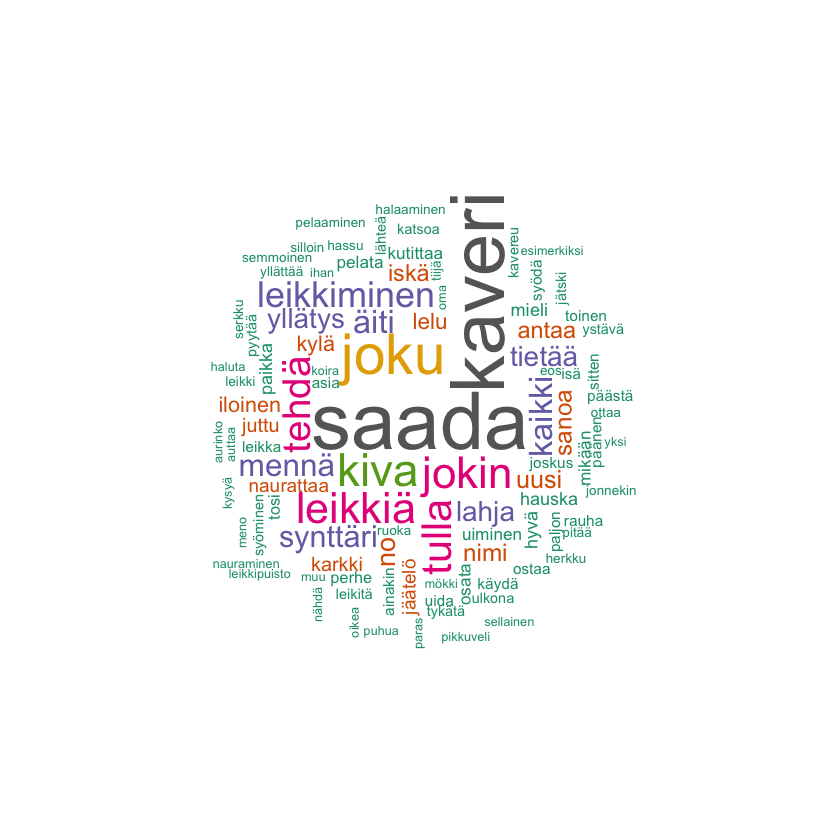

In [19]:
fst_wordcloud(data = df,
              pos_filter = NULL,
              max = 100,
              use_column_weights = FALSE)

## Step 4: Quantify most frequent words and phrases

The functions we use here are `fst_freq` and `fst_ngrams`. An n-gram is a set of n words in order within reponses. 

Again, we are not looking at `use_svydesign_weights`, `id` and `svydesign`, and default values will be used below. 

The remaining inputs are: 

* (both) data: formatted data
* (both) number: number of top words/ngrams to return
    * default: 10
* (both) norm: optional method for normalising the data. Valid settings are "number_words" (the number of words in the responses), "number_resp" (the number of responses), or NULL (raw count returned, should be used when weights are applied)
    * default: NULL
* (both) pos_filter: as above
    * default: NULL
* (both) strict: whether to strictly cut-off plot at "number" (ties are alphabetically ordered).
    * default: TRUE
* (both) name: optional, a name to include in the plot title. 
    * default: NULL
* (both) use_column_weights: as above, this should be set to TRUE if using weights column
    * default: FALSE
* (only in `fst_ngrams`) ngrams: type of n-gram
    * default: 1


Note:
 Words with equal occurrence are presented in alphabetical order. 
 By default, words are presented in order to the `number` cutoff word. 
 This means that equally-occurring later-alphabetically words beyond the cutoff word will not be displayed.



Note:
 N-grams with equal occurrence are presented in alphabetical order. 
 With `strict` = FALSE, n-grams occurring equally often as the `number` cutoff n-gram will be displayed. 





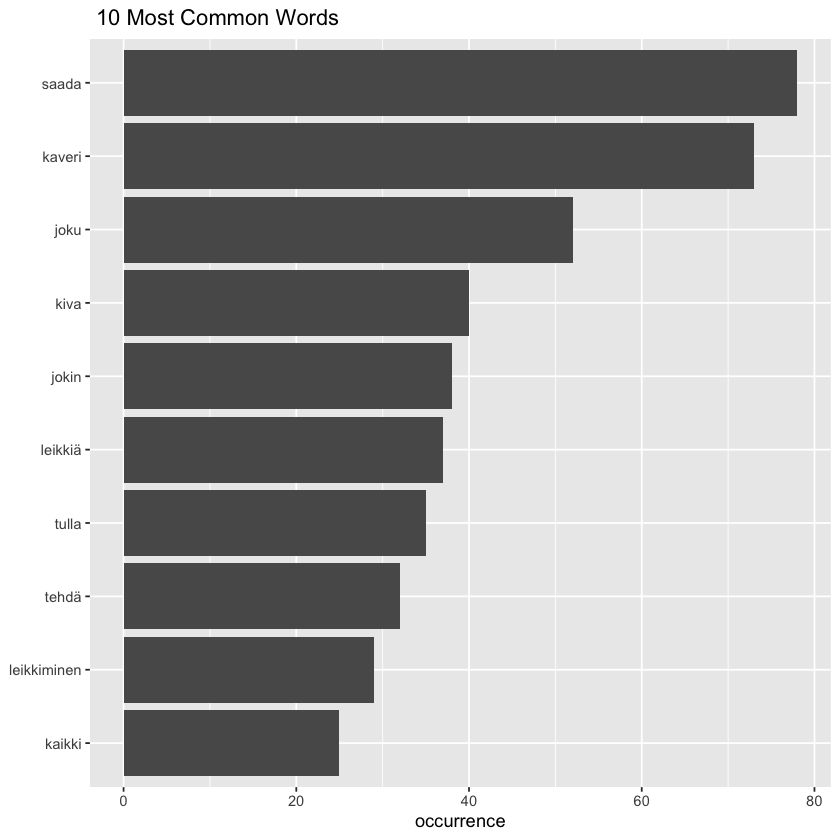

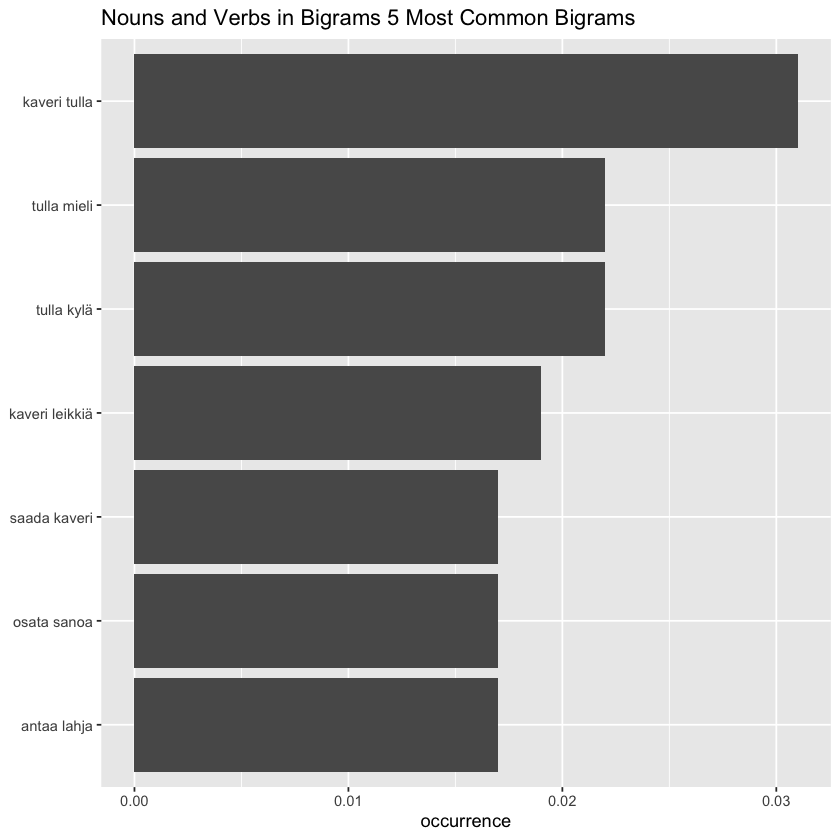

In [27]:
fst_freq(data = df,
         number = 10,
         norm = NULL,
         pos_filter = NULL,
         strict = TRUE,
         use_column_weights = FALSE)
  
fst_ngrams(data = df,
           number = 5,
           ngrams = 2,
           norm = "number_resp",
           pos_filter = c("NOUN", "VERB"),
           strict = FALSE,
           name = "Nouns and Verbs in Bigrams",
           use_column_weights = FALSE)

## Step 5: Concept Network

Our concept network function uses the TextRank algorithm which is a graph-based ranking model for text processing. Vertices represent words and co-occurrence between words is shown through edges. Word importance is determined recursively (through the unsupervised learning TextRank algorithm) where words get more weight based on how many words co-occur and the weight of these co-occurring words.

To utilise the TextRank algorithm in `finnsurveytext`, we use the `textrank` package. For further information on the package, please see [this documentation](https://cran.r-project.org/web/packages/textrank/vignettes/textrank.html). This package implements the TextRank and PageRank algorithms. (PageRank is the algorithm that Google uses to rank webpages.) You can read about the underlying TextRank algorithm [here](https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf) and about the PageRank algorithm [here](https://www.sciencedirect.com/science/article/abs/pii/S016975529800110X).

The main concept network function is `fst_concept_network()`.

* data: as above, your formatted data
* concepts: a string of concepts of interest, around which the network will be built
* threshold: a minimum number of occurences of co-occurence between words before it will be included in the network, useful if the network is too busy
    * default is NULL
* norm: as above
    * default is NULL
* pos_filter: as above
    * default is NULL
* title: an optional title
    * default is NULL and a generic title (“TextRank extracted keyword occurrences”) will be used.
                                

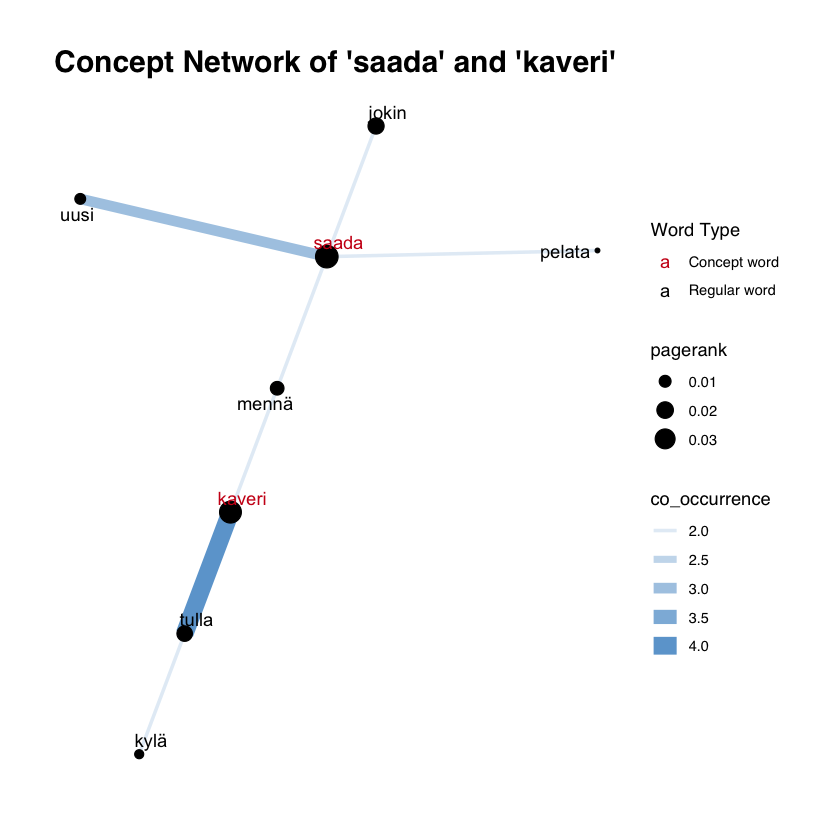

In [31]:
fst_concept_network(data = df, 
                    concepts = 'saada, kaveri',
                    threshold = NULL,
                    norm = NULL,
                    pos_filter = NULL,
                    title = "Concept Network of 'saada' and 'kaveri'")

## Step 6: Comparison Functions

Now, we will use the columns we added through `add_cols` in Step 1, to compare responses between groups. 

The common new inputs to functions are: 

* field: the column in formatted data used for splitting groups
* exclude_nulls: whether to include or exclude surveys with no response in "field". 
    * the default value is FALSE.
* rename_nulls: what to fill empty values with if exclude_nulls = FALSE.
    * default is "null_data"
    
#### First, let's consider our summary tables: 

* `fst_summarise_compare`
* `fst_pos_compare`
* `fst_length_compare`

(Note: there are no nulls in our data for "gender" of survey participant)

In [41]:
fst_summarise_compare(data = df, 
                     field = "gender", 
                     exclude_nulls = FALSE,
                     rename_nulls = 'N/A')

fst_pos_compare(data = df, 
               field = "gender", 
               exclude_nulls = FALSE, 
               rename_nulls = 'N/A')

fst_length_compare(data = df, 
                   field = "gender", 
                   incl_sentences = FALSE,
                   exclude_nulls = FALSE, 
                   rename_nulls = 'N/A')

Description,Respondents,No Response,Proportion,Total Words,Unique Words,Unique Lemmas
<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>
boy,213,0,1,788,413,315
girl,201,0,1,786,384,286


UPOS,Part_of_Speech_Name,boy-Count,boy-Prop,girl-Count,girl-Prop
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
ADJ,adjective,63,0.080,65,0.083
ADP,adposition,2,0.003,5,0.006
ADV,adverb,40,0.051,33,0.042
AUX,auxiliary,17,0.022,17,0.022
CCONJ,coordinating conjunction,2,0.003,NA,NA
DET,determiner,46,0.058,34,0.043
INTJ,interjection,15,0.019,10,0.013
NOUN,noun,336,0.426,349,0.444
NUM,numeral,6,0.008,2,0.003


Description,Respondents,Mean,Minimum,Q1,Median,Q3,Maximum
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
boy- Words,213,5.437,1,2,4,7,28
girl- Words,201,5.811,1,2,4,8,38


#### Now, let's create a comparison cloud. 

The comparison cloud extends the wordcloud concept.

A comparison cloud compares the relative frequency with which a term is used in two or more documents. This cloud shows words that occur more regularly in responses from a specific type of respondent. For more information about comparison clouds, you can read [this documentation](https://cran.r-project.org/web/packages/wordcloud/wordcloud.pdf).

(Note: we are wrapping this function in `suppressWarnings({})` to hide excessive warnings for this function call.)

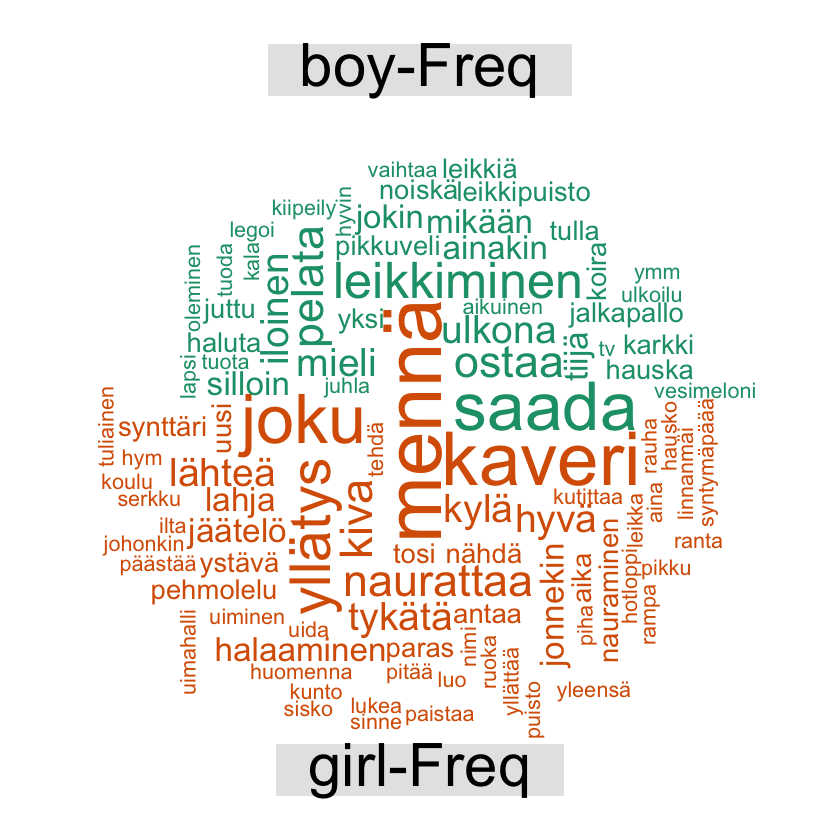

In [45]:
suppressWarnings({
    fst_comparison_cloud(data = df,
                     field = "gender",
                     pos_filter = NULL,
                     max = 100,
                     use_column_weights = FALSE,
                     exclude_nulls = FALSE,
                     rename_nulls = "null_data") 
    })

#### Next, we'll consider frequent words and n-grams. 

The new inputs are: 

* unique_colour: a colour to highlight terms unique to one group
    * the default is "indianred",
* title_size: size for comparison plot title.
    * default is 20,
* subtitle_size: size for group value subtitle
    * default is 15

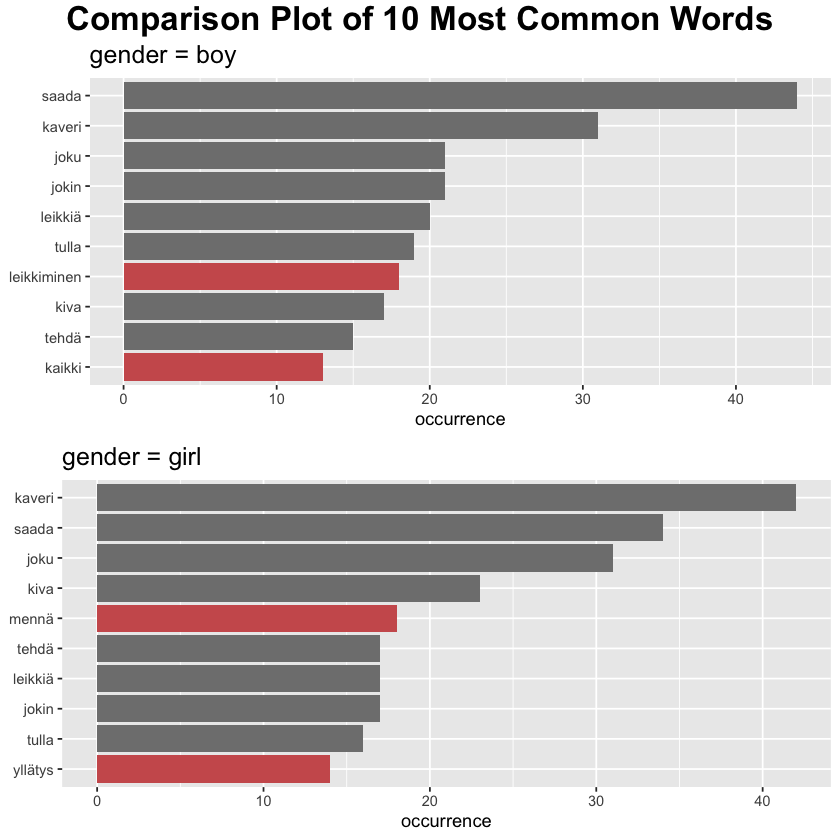

In [55]:
fst_freq_compare(data = df,
                 field = 'gender',
                 number = 10,
                 norm = NULL,
                 pos_filter = NULL,
                 strict = TRUE,
                 use_column_weights = FALSE,
                 exclude_nulls = FALSE,
                 rename_nulls = 'null_data',
                 unique_colour = "indianred",
                 title_size = 20,
                 subtitle_size = 15)

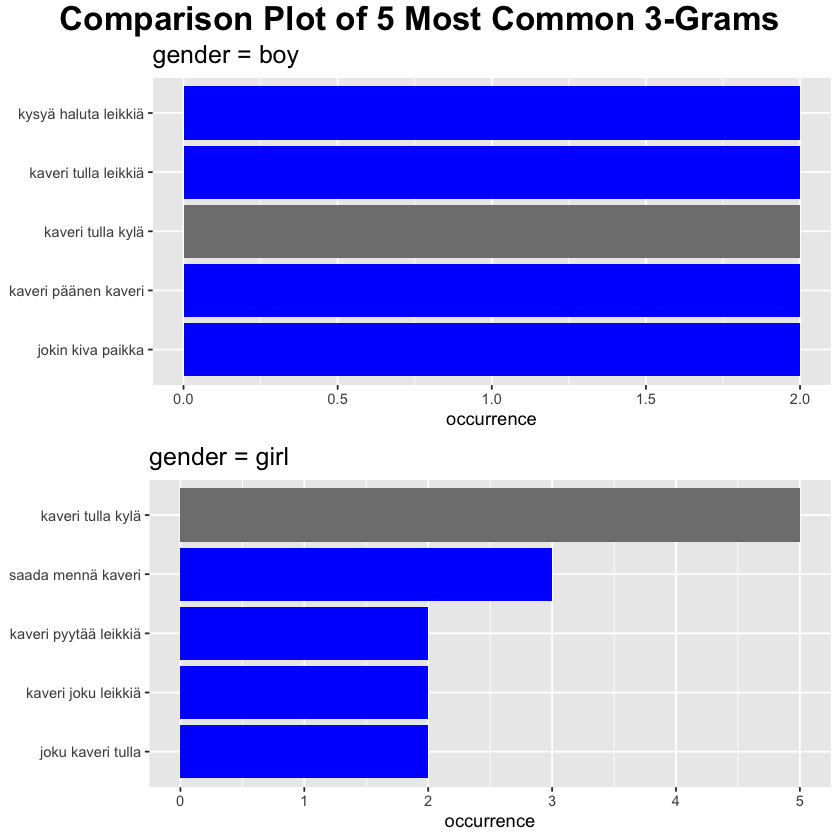

In [57]:
fst_ngrams_compare(data = df,
                   field = 'gender',
                   number = 5,
                   ngrams = 3,
                   norm = NULL,
                   pos_filter = NULL,
                   strict = TRUE,
                   use_column_weights = FALSE,
                   exclude_nulls = FALSE,
                   rename_nulls = 'null_data',
                   unique_colour = "blue",
                   title_size = 20,
                   subtitle_size = 15)

#### Finally, let's create a comparison of concept networks. 

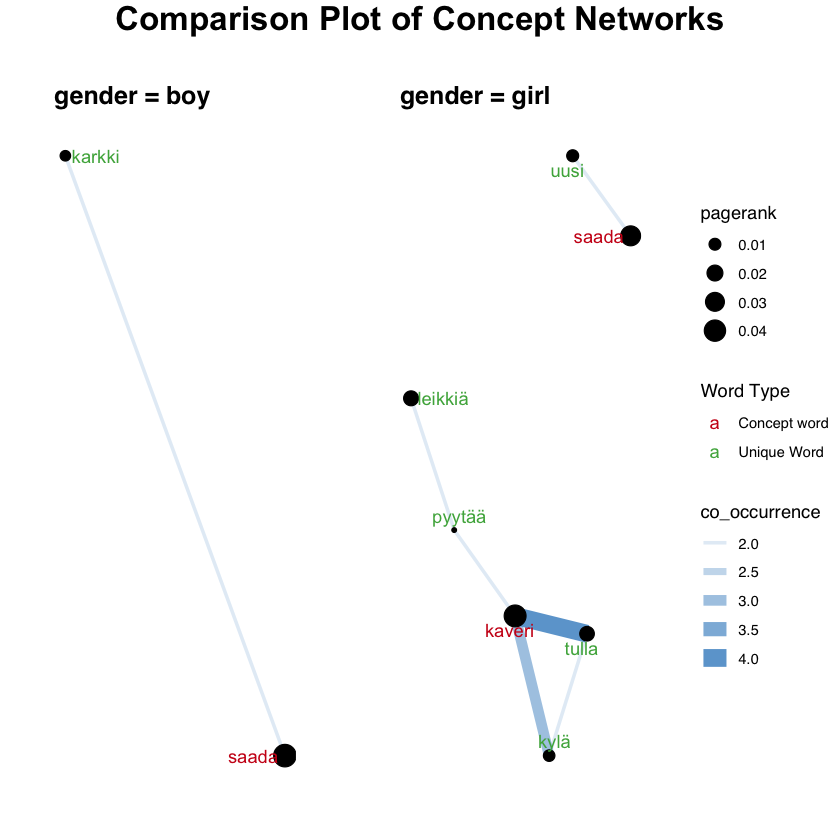

In [58]:
fst_concept_network_compare(data = df,
                            concepts = 'saada, kaveri',
                            field = 'gender',
                            norm = NULL,
                            threshold = NULL,
                            pos_filter = NULL,
                            exclude_nulls = FALSE,
                            rename_nulls = 'null_data',
                            title_size = 20,
                            subtitle_size = 15)

## Congratulations! 

For further exploration of `finnsurveytext`, consider the other tutorials: 

1. svydesign tutorial (TO-DO) 
2. In-depth 01 (TO-DO) 
3. In-depth 02
4. In-depth 03
5. In-depth comparison (04 and 05) 

Also, see the website, R Shiny and CRAN pages which also include a way to get in contact with the development team! 

We hope `finnsurveytext` has helped you with your analysis of open-ended questions in your survey!